In [751]:
import sklearn
# 加载数据集
iris = sklearn.datasets.load_iris()

for i in iris:
    print(i)
print(iris.data.dtype)
print(iris.data.shape)
print(iris.target.shape)

# 取前100行，分割数据为训练集和测试集
def splitTrainTest(test_size=0.2):
    return sklearn.model_selection.train_test_split(iris.data[:100], iris.target[:100], test_size=test_size)


data
target
frame
target_names
DESCR
feature_names
filename
data_module
float64
(150, 4)
(150,)


In [752]:
import numpy as np
# 前向传播


def forward(x, theta, bias):
    z = theta @ x.T + bias
    return 1 / (1 + np.exp(-z))

# 交叉熵损失函数


def loss(y, y_hat):
    epsilon = 1e-10
    return np.mean(-y * np.log(y_hat + epsilon) - (1 - y) * np.log(1-y_hat + epsilon))

# 梯度  损失函数的偏导数


def gradient(x, y, y_hat):
    m = x.shape[-1]
    return np.dot(y_hat-y, x)/m, np.mean(y_hat-y)

# 训练


def train(train_X, train_y, epoch, learnRate, epsilon):
    theta = np.random.randn(4)
    bias = 0
    last_loss = 10000

    for i in range(epoch):
        y_hat = forward(train_X, theta, bias)
        cur_loss = loss(train_y, y_hat)
        if last_loss - cur_loss < epsilon:
            print(
                f'学习率 {learnRate}，在第{i}次梯度后下降停止训练，此时损失函数为 {cur_loss}\n参数 θ = {theta}，参数 bias = {bias}')
            break
        delta_w, delta_b = gradient(train_X, train_y, y_hat)
        theta -= learnRate * delta_w
        bias -= learnRate * delta_b
        last_loss = cur_loss
    return theta, bias


In [753]:
def trainAndTest(test_size=[0.2], epoch=50000, learnRate=[1e-3], epsilon=1e-5):
    result = []
    for ts in test_size:
        train_X, test_X, train_y, test_y = splitTrainTest(ts)
        # print(train_X.shape,  test_X.shape, train_y.shape, test_y.shape)
        for lr in learnRate:
            theta, bias = train(train_X, train_y, learnRate=lr,
                                epoch=epoch, epsilon=epsilon)
            y_hat = forward(test_X, theta, bias)
            result.append(loss(test_y, y_hat))
    return result


学习率 0.001，在第1696次梯度后下降停止训练，此时损失函数为 0.01827440157067507
参数 θ = [-0.10175955 -2.12161993  2.34801082  0.8071063 ]，参数 bias = -0.01880223414731128
学习率 0.001，在第1751次梯度后下降停止训练，此时损失函数为 0.018518333977208742
参数 θ = [-0.58575377 -1.51140279  2.52474537  1.13824606]，参数 bias = -0.011983378700529427
学习率 0.001，在第1632次梯度后下降停止训练，此时损失函数为 0.01862536165859711
参数 θ = [ 0.01705188 -2.24678704  2.14573953  1.11925237]，参数 bias = -0.0027657071799719263
学习率 0.001，在第1769次梯度后下降停止训练，此时损失函数为 0.01773466900542917
参数 θ = [-0.86561256 -1.14763625  2.68071222  1.09033999]，参数 bias = -0.023600831286516785
学习率 0.001，在第1798次梯度后下降停止训练，此时损失函数为 0.01869044081197591
参数 θ = [ 0.1111809  -2.29270396  1.86012623  1.76307803]，参数 bias = -0.00030115170033207455
学习率 0.001，在第1687次梯度后下降停止训练，此时损失函数为 0.018802706517327437
参数 θ = [-0.17713662 -1.98690439  2.19360019  1.27075756]，参数 bias = -0.005667564456638904
学习率 0.001，在第1845次梯度后下降停止训练，此时损失函数为 0.01938398252297525
参数 θ = [-1.29067172 -0.74016974  3.26186662  0.39021111]，参数 bias = -0.0175913

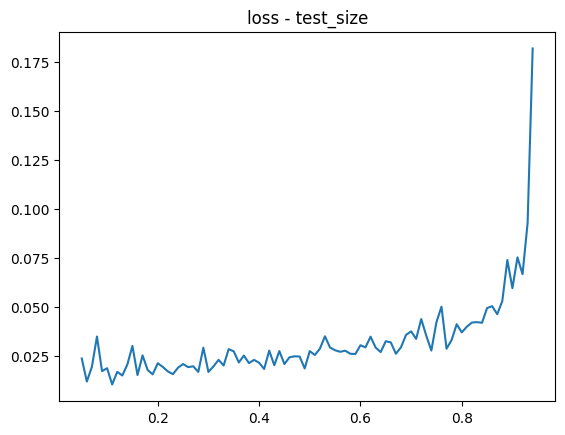

学习率 0.0002，在第3751次梯度后下降停止训练，此时损失函数为 0.04191046570252242
参数 θ = [-1.17345033 -0.32914824  2.4597962   0.65348327]，参数 bias = -0.0017383146094969416
学习率 0.0004，在第2756次梯度后下降停止训练，此时损失函数为 0.029929357017121305
参数 θ = [-1.06842755 -0.68579302  2.7450458   0.29642125]，参数 bias = -0.008636962989398951
学习率 0.0006，在第2470次梯度后下降停止训练，此时损失函数为 0.024626872482088513
参数 θ = [-0.8447402  -1.08964573  2.8191715   0.05592286]，参数 bias = -0.010212694941241468
学习率 0.0008，在第2132次梯度后下降停止训练，此时损失函数为 0.021424257935164455
参数 θ = [-0.31463892 -1.75489105  2.37394898  0.60941525]，参数 bias = -0.020124981864461485
学习率 0.001，在第1864次梯度后下降停止训练，此时损失函数为 0.019199654026634917
参数 θ = [-0.3325465  -1.77114231  2.33595569  0.94275644]，参数 bias = -0.020080711730093796
学习率 0.0012，在第1695次梯度后下降停止训练，此时损失函数为 0.017471540968757082
参数 θ = [-0.56361326 -1.49090828  2.27162007  1.68146121]，参数 bias = 0.0006811052997235869
学习率 0.0014，在第1542次梯度后下降停止训练，此时损失函数为 0.01634665678385147
参数 θ = [-0.20778478 -2.02274118  2.35278532  0.99450889]，参数 bias = -0

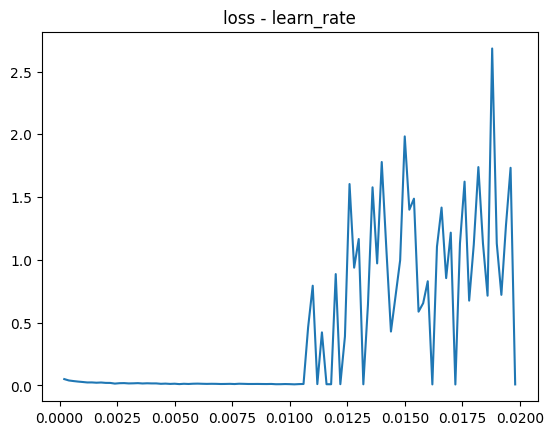

In [754]:
import matplotlib.pyplot as plt

plot_x = [i/100 for i in range(5, 95)]
plot_y = trainAndTest(test_size=plot_x)
plt.plot(plot_x, plot_y)
plt.title('loss - test_size')
plt.show()

plot_x = [i/5000 for i in range(1, 100)]
plot_y = trainAndTest(learnRate=plot_x)
plt.plot(plot_x, plot_y)
plt.title('loss - learn_rate')
plt.show()


In [776]:
train_X, test_X, train_y, test_y = splitTrainTest(0.2)
print(train_X.shape,  test_X.shape, train_y.shape, test_y.shape)
theta, bias = train(train_X, train_y, learnRate=0.008,
                    epoch=50000, epsilon=1e-5)
np.save('theta', theta)
np.save('bias', bias)
y_hat = forward(test_X, theta, bias)
loss(test_y, y_hat)


(80, 4) (20, 4) (80,) (20,)
学习率 0.008，在第696次梯度后下降停止训练，此时损失函数为 0.007536073101410098
参数 θ = [-0.69349071 -1.95559819  3.02729965  1.90864932]，参数 bias = -0.02509183028731669


0.0035521949445878574

In [777]:
loaded_theta = np.load('theta.npy')
loaded_bias = np.load('bias.npy')
print(loaded_theta, loaded_bias)
y_hat = forward(test_X, loaded_theta, loaded_bias)
loss(test_y, y_hat)


[-0.69349071 -1.95559819  3.02729965  1.90864932] -0.02509183028731669


0.0035521949445878574